In [11]:
!pip3 install imblearn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv("/Users/danort/Desktop/Ironhack labs/unit4/cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")


In [13]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [14]:
# Identify continuous variables (float64 or int64)
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Identify discrete variables (object or int64 with limited unique values)
categorical_df = df.select_dtypes(include=['object', 'int64'])

# Check unique values in each column of the categorical_df
unique_counts = df.nunique()

# Identify columns with a limited number of unique values (threshold set to 10 in this example)
discrete_columns = unique_counts[unique_counts <= 10].index
categorical_df = df[discrete_columns]

# 1. Open the categoricals variable we created before.


In [15]:
categoricals = df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# 2. Plot all the categorical variables with the proper plot. What can you see?

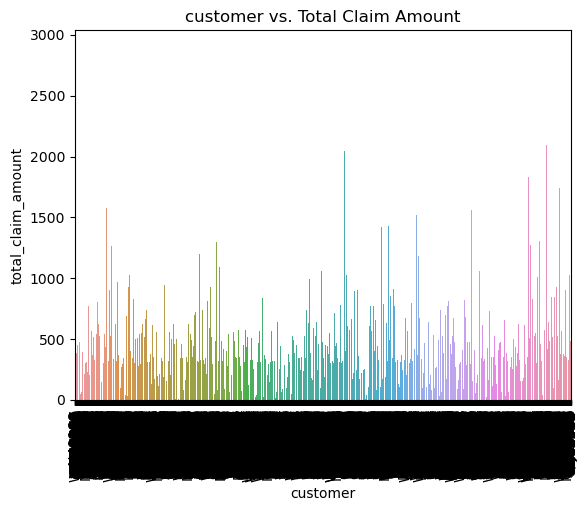

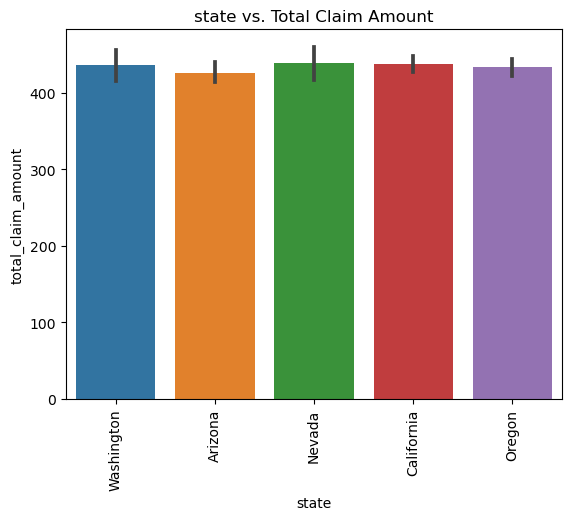

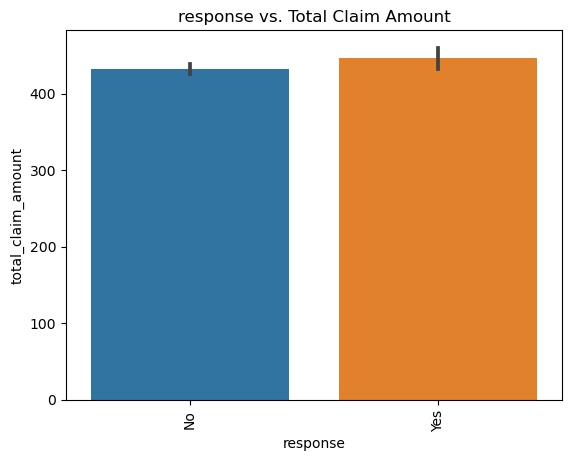

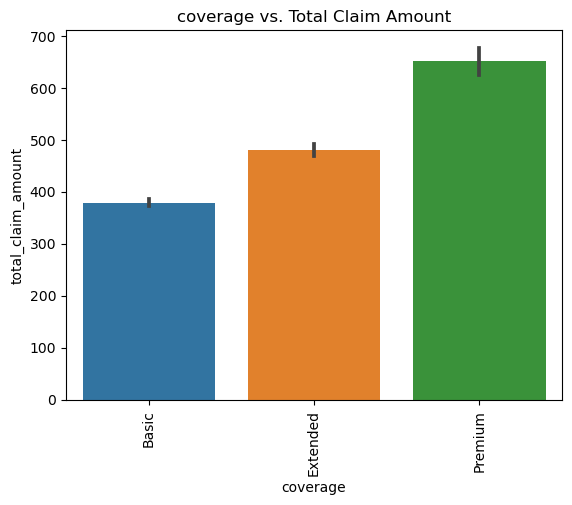

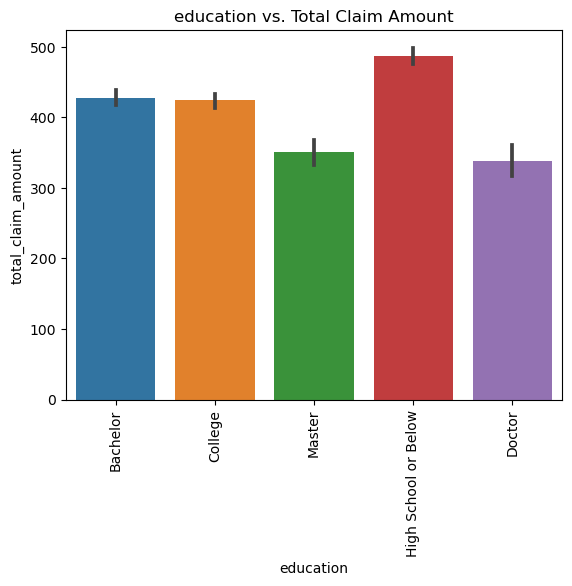

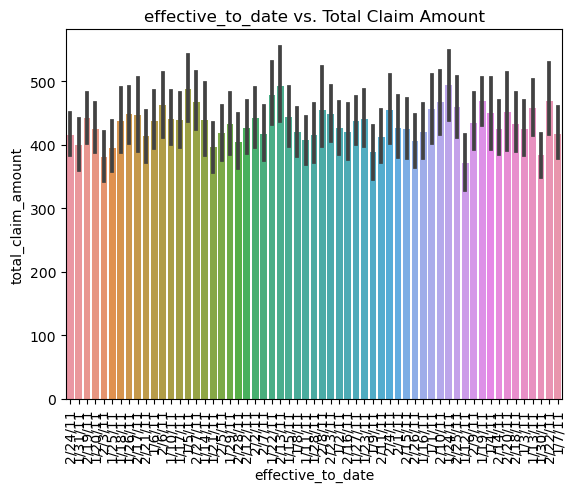

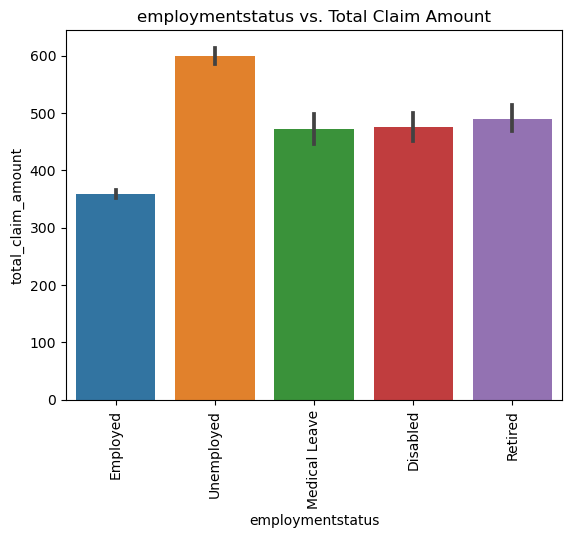

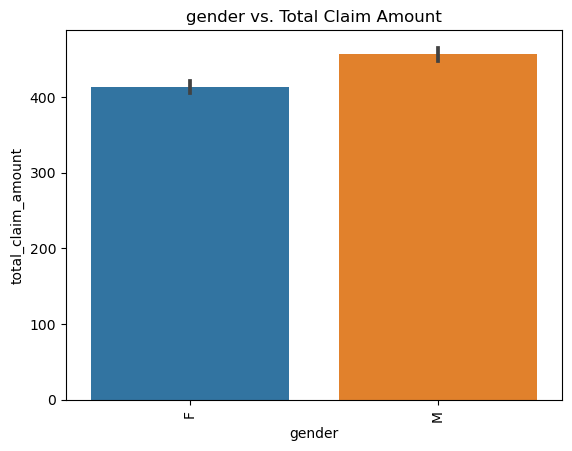

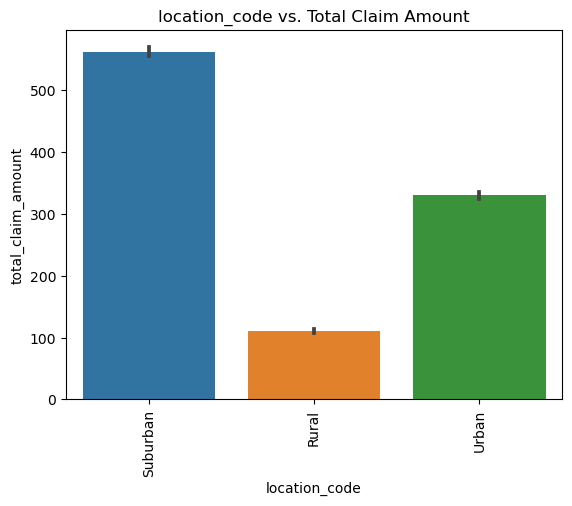

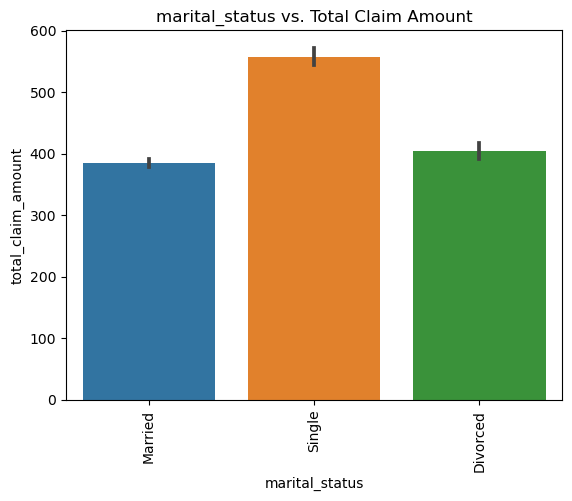

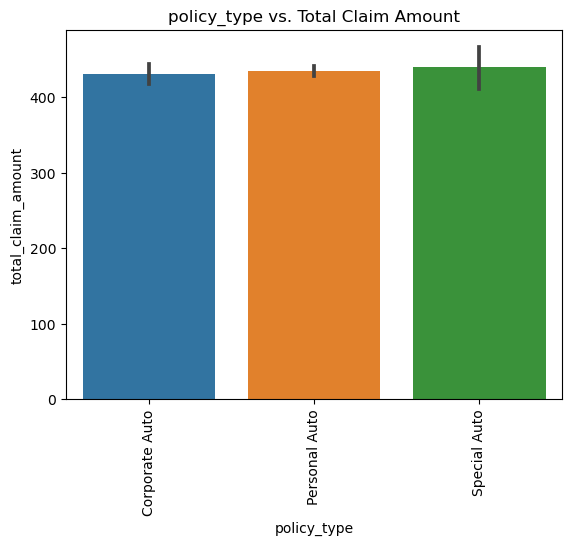

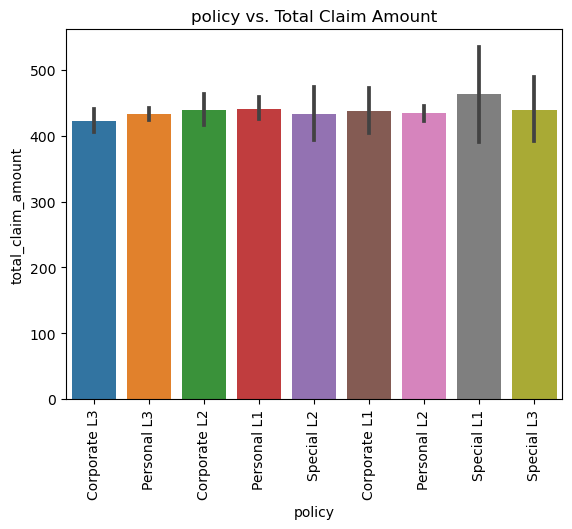

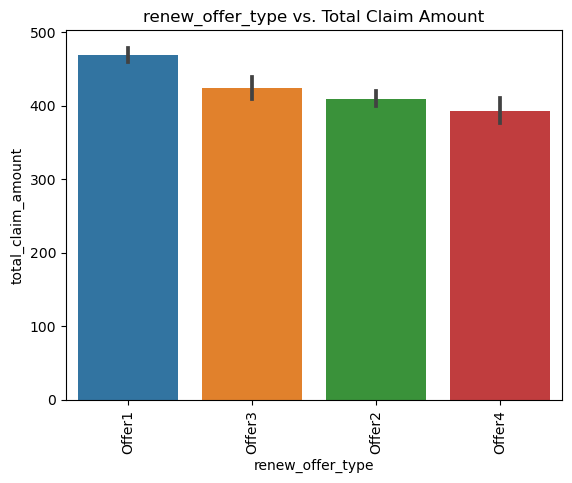

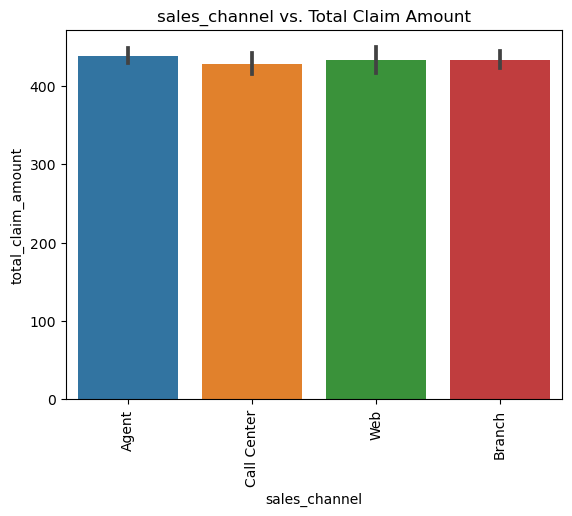

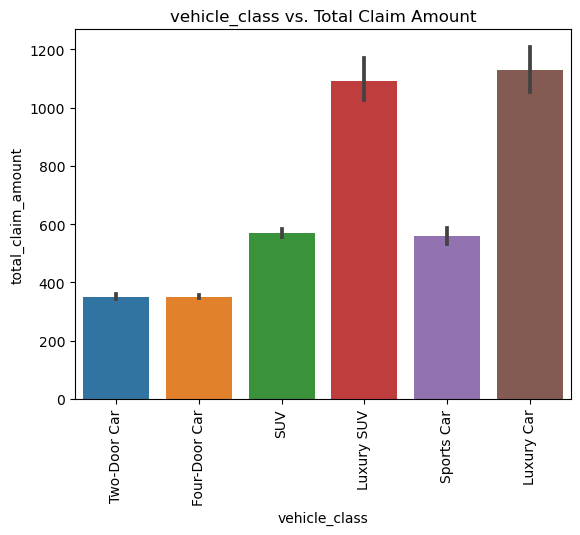

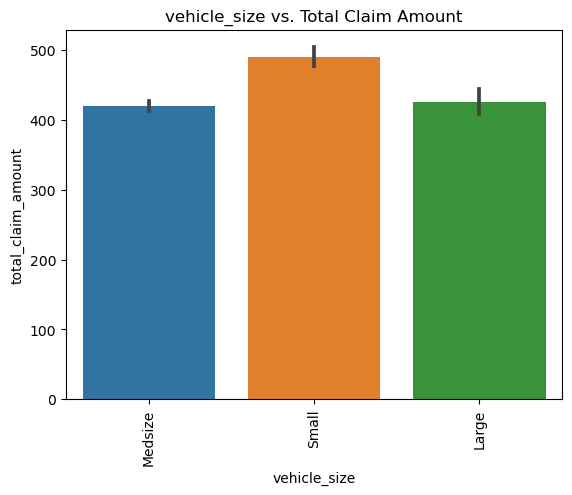

In [16]:
for col in categoricals.columns:
    sns.barplot(x=col, y='total_claim_amount', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} vs. Total Claim Amount')
    plt.show()
    
    # we can visualize the average or total value of the target variable for each category.
    # We can also countplot our categorical vrs the target value to see the distribution.

In [25]:
# Let's convert "effective_to_date" to a datetime formart.
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
print(df.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Extract numerical features from the date column (example: days since the earliest date)
df['days_since_start'] = (df['effective_to_date'] - df['effective_to_date'].min()).dt.days

# Select features and target
X = df[['days_since_start']]  # Use double brackets to keep X as a DataFrame
y = df['total_claim_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Reshape the 1D arrays to 2D arrays
X_train_std = X_train_std.reshape(-1, 1)
X_test_std = X_test_std.reshape(-1, 1)

# Fit the model
lr = LinearRegression()
lr.fit(X_train_std, y_train)

# Make predictions
predictions = lr.predict(X_test_std)

# Evaluate the model
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: -0.002933371216732983
MAE: 204.41095024989693
RMSE: 282.39029049694255


In [38]:
values_redundant = pd.Series([abs(i) for i in lr.coef_], index=X_train.columns).sort_values(ascending=False)
values_redundant

days_since_start    0.321829
dtype: float64

# 4. Plot time variable. Can you extract something from it?

<Axes: >

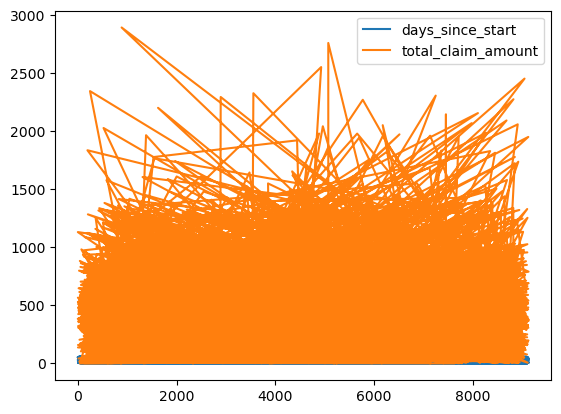

In [39]:
df[["days_since_start", "total_claim_amount"]].sort_values("days_since_start").plot()